In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error, r2_score

In [86]:
DF = pd.read_csv('solarenergy_dataset.csv')
DF.head()

C:\Users\saha0\AppData\Local\Temp\ipykernel_25888\2078765200.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  DF = pd.read_csv('solarenergy_dataset.csv')


,Datetime,solar_mw,wind-direction,wind-speed,humidity,average-wind-speed-(period),average-pressure-(period),temperature
0,03/08/2020 0:00,11385,27,7.5,75.0,8.0,29.82,69.0
1,02/08/2020 23:00,12390,27,7.5,77.0,5.0,29.85,69.0
2,02/08/2020 22:00,13312,27,7.5,70.0,0.0,29.89,69.0
3,02/08/2020 21:00,13832,27,7.5,33.0,0.0,29.91,69.0
4,02/08/2020 20:00,14038,27,7.5,21.0,3.0,29.89,69.0


In [87]:
# Sort the dataframe by Datetime column
DF = DF.sort_values(by='Datetime').reset_index(drop=True)
DF.head()

,Datetime,solar_mw,wind-direction,wind-speed,humidity,average-wind-speed-(period),average-pressure-(period),temperature
0,01/01/2008 0:00,9649,NaN,NaN,NaN,NaN,NaN,NaN
1,01/01/2008 10:00,10046,NaN,NaN,NaN,NaN,NaN,NaN
2,01/01/2008 11:00,10064,NaN,NaN,NaN,NaN,NaN,NaN
3,01/01/2008 12:00,9887,NaN,NaN,NaN,NaN,NaN,NaN
4,01/01/2008 13:00,9789,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116117 entries, 0 to 116116
Data columns (total 8 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Datetime                     116117 non-null  object 
 1   solar_mw                     116117 non-null  int64  
 2   wind-direction               2920 non-null    object 
 3   wind-speed                   2920 non-null    float64
 4   humidity                     2920 non-null    float64
 5   average-wind-speed-(period)  2919 non-null    float64
 6   average-pressure-(period)    2920 non-null    float64
 7   temperature                  2920 non-null    float64
dtypes: float64(5), int64(1), object(2)
memory usage: 7.1+ MB


In [88]:
# Dropping the null values
DF = DF.dropna()

In [65]:
# Brief description about the dataset
DF.describe()

,solar_mw,wind-speed,humidity,average-wind-speed-(period),average-pressure-(period),temperature
count,2206.000000,2206.000000,2206.000000,2206.000000,2206.000000,2206.000000
mean,12004.827743,9.283908,73.473708,9.326836,30.047520,56.697189
std,2548.658469,5.039133,15.706000,7.289770,0.146405,6.704577
min,7298.000000,1.100000,14.000000,0.000000,29.480000,42.000000
25%,9941.250000,5.300000,65.000000,3.000000,29.940000,52.000000
50%,11720.500000,8.750000,77.000000,8.000000,30.040000,56.000000
75%,13905.500000,12.300000,86.000000,14.000000,30.150000,61.000000
max,19244.000000,26.600000,100.000000,40.000000,30.530000,77.000000


In [66]:
datetime = ['Datetime']
num_features = ['wind-speed', 'humidity', 'average-wind-speed-(period)', 'average-pressure-(period)', 'temperature']
cat_features = ['wind-direction']
target = ['solar_mw']

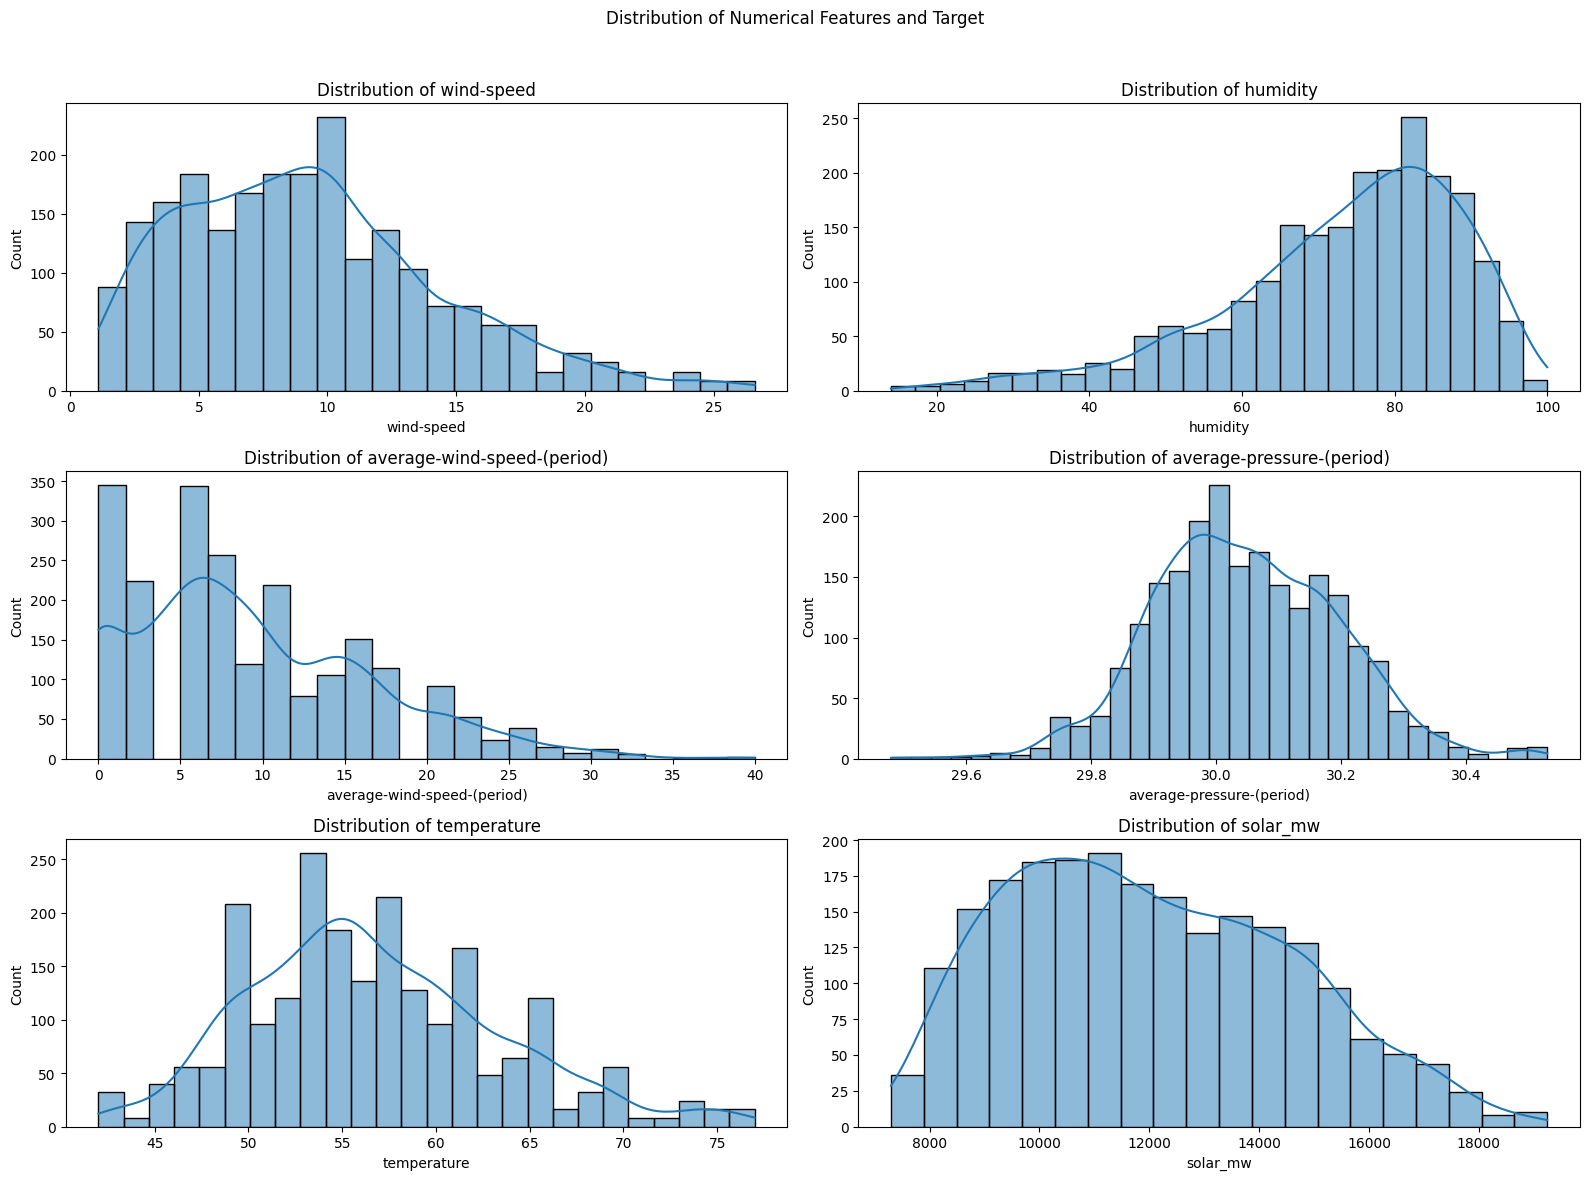

In [67]:
# Plotting distributions of numerical features
fig, axes = plt.subplots(3, 2, figsize=(16, 12))
fig.suptitle('Distribution of Numerical Features and Target')

for i, feature in enumerate(num_features + target):
    sns.histplot(DF[feature], kde=True, ax=axes[i // 2, i % 2])
    axes[i // 2, i % 2].set_title(f'Distribution of {feature}')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

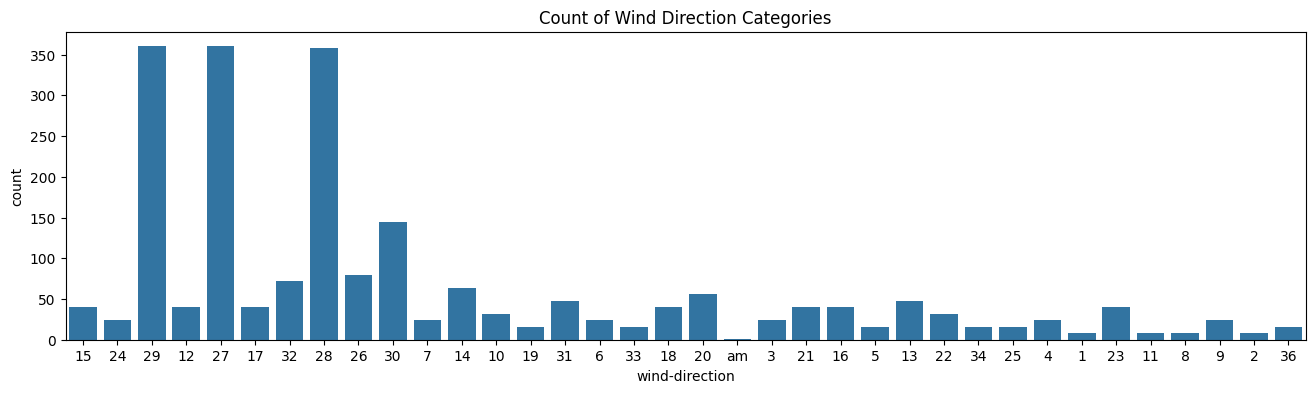

In [68]:
# Plotting count plot for categorical feature 'wind-direction'
plt.figure(figsize=(16, 4))
sns.countplot(data=DF, x='wind-direction')
plt.title('Count of Wind Direction Categories')
plt.show()

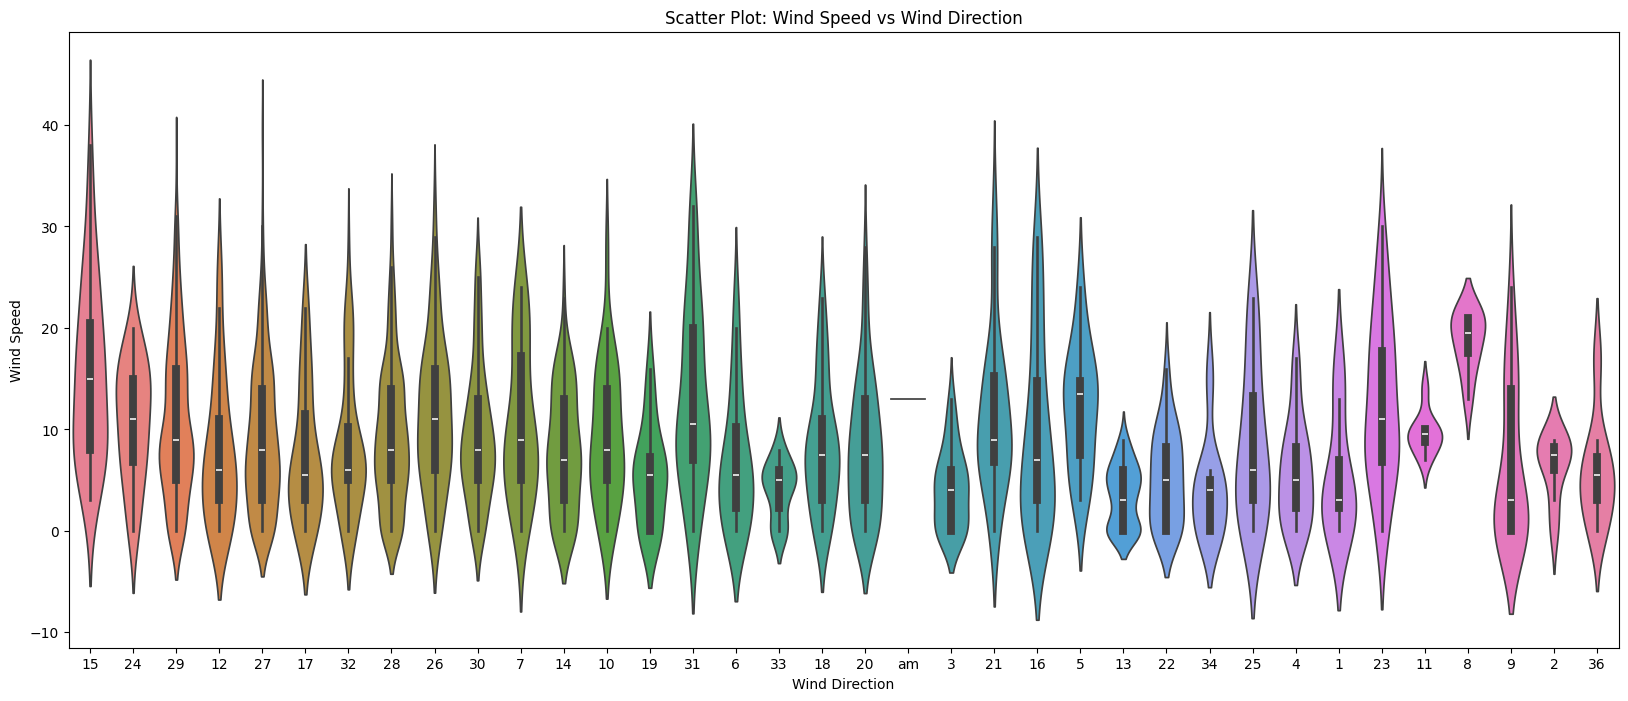

In [69]:
# Scatter plot of wind direction vs wind speed
plt.figure(figsize=(20, 8))
sns.violinplot(data=DF, x='wind-direction', y='average-wind-speed-(period)', hue='wind-direction', legend=False)
plt.title('Scatter Plot: Wind Speed vs Wind Direction')
plt.xlabel('Wind Direction')
plt.ylabel('Wind Speed')
plt.show()

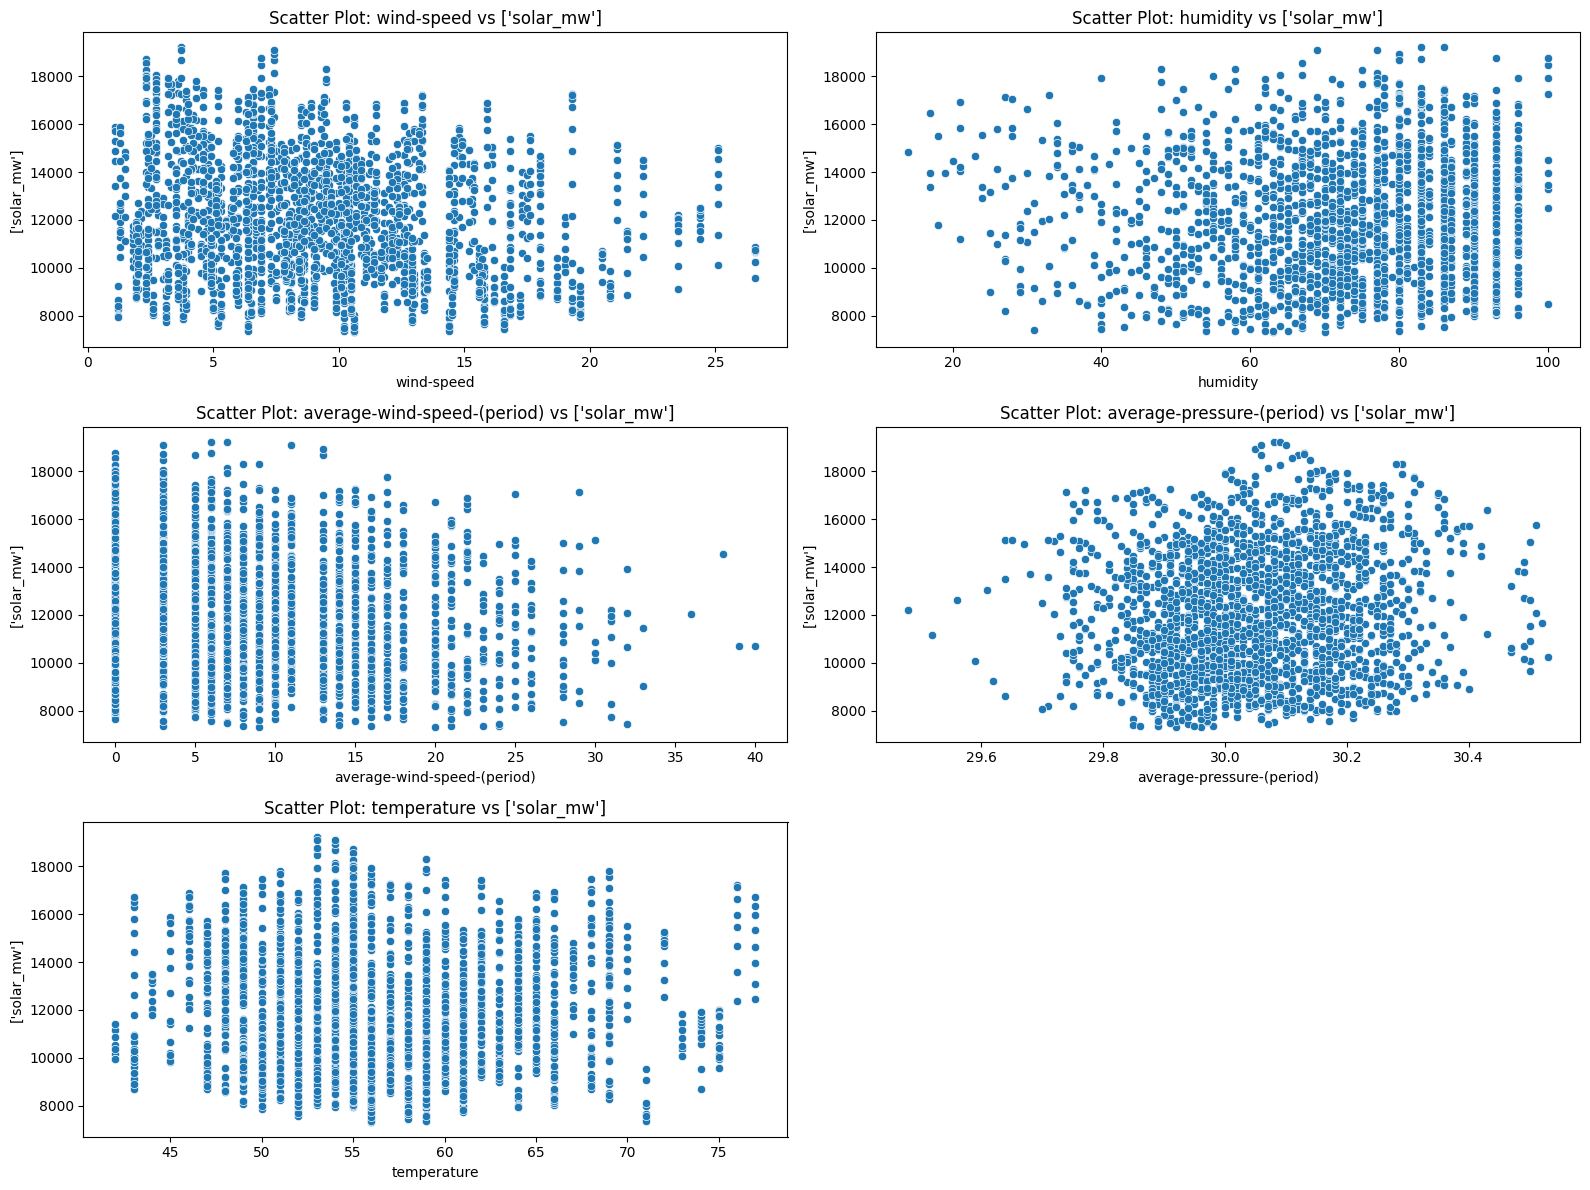

In [70]:
# Set up the figure for multiple subplots
plt.figure(figsize=(16, 12))

for i, feature in enumerate(num_features):
    plt.subplot(3, 2, i+1)
    sns.scatterplot(data=DF, x=feature, y=target[0])
    plt.title(f'Scatter Plot: {feature} vs {target}')
    plt.xlabel(feature)
    plt.ylabel(target)

plt.tight_layout()
plt.show()

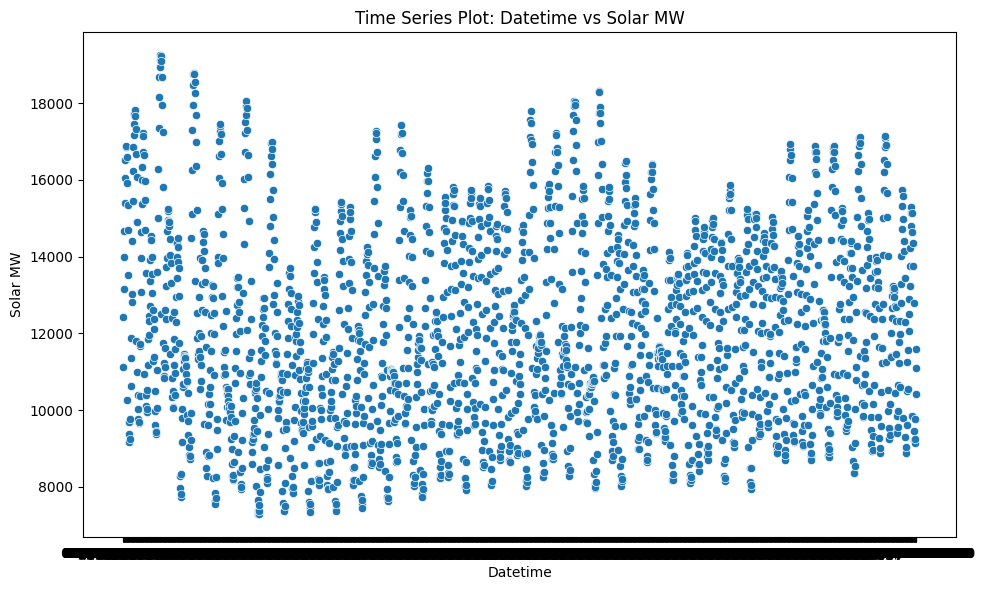

In [89]:
# Time series plot: Datetime vs solar_mw
plt.figure(figsize=(10, 6))
sns.scatterplot(data=DF, x='Datetime', y='solar_mw')
plt.title('Time Series Plot: Datetime vs Solar MW')
plt.xlabel('Datetime')
plt.ylabel('Solar MW')
plt.tight_layout()
plt.show()

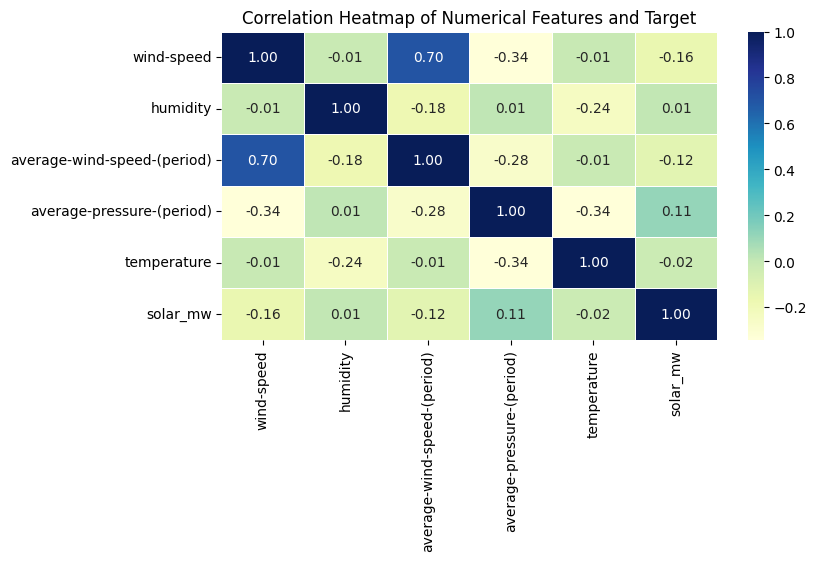

In [73]:
corr_matrix = DF[num_features + target].corr()

# Plot the correlation heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features and Target')
plt.show()

In [90]:
# Convert the 'Datetime' column to datetime format
DF['Datetime'] = pd.to_datetime(DF['Datetime'], errors='coerce')
DF['day'] = DF['Datetime'].dt.day
DF['month'] = DF['Datetime'].dt.month

In [91]:
# Replace 'am' with 0 in the 'wind-direction' column
DF['wind-direction'] = DF['wind-direction'].replace('am', 0)

In [100]:
# Define features and target
X = DF[['wind-direction', 'wind-speed', 'humidity', 'average-wind-speed-(period)', 'average-pressure-(period)', 'temperature']]
y = DF['solar_mw']

In [103]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [104]:
# Fit and transform the training set, and only transform the test set
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [110]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [112]:
rnf_model = RandomForestRegressor(random_state=42)

# Setting up GridSearchCV
grid_search = GridSearchCV(estimator=rnf_model, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Fit GridSearchCV
grid_search.fit(X_train_scaled, y_train)

# Get the best model
best_rnf_model = grid_search.best_estimator_

# Make predictions with the best model
y_pred_rn = best_rnf_model.predict(X_test_scaled)

# Evaluate the model
rnf_mse = mean_squared_error(y_test, y_pred_rn)
rnf_r2 = r2_score(y_test, y_pred_rn)

print(f"Random Forest Mean Squared Error: {rnf_mse}")
print(f"Random Forest R2 Score: {rnf_r2}")
print(f"Best Hyperparameters: {grid_search.best_params_}")

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


C:\Users\saha0\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
73 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\saha0\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\saha0\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-p

Random Forest Mean Squared Error: 2298032.5227001244
Random Forest R2 Score: 0.6136320527436616
Best Hyperparameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
